In [ ]:
# Find correlations in data with price
# Predictor variables: sqft_living, grade, sqft_above, sqft_living15, bathrooms. 
# Plot correlations and run regressions
# Plot coordinates of lat and long to find rich neighborhoods and poor neighborhoods
# Measure how close the rich neighborhoods are to poor neighborhoods 
# Find additional data from a different year for possible predictions of future prices
# Compile and compare data to find correlations and predictors over time
# Predict depreciation of house prices in proximity to increased house prices
# Input function  

In [138]:
#Let's examine the data
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
mapbox_access_token = 'pk.eyJ1Ijoic2FtYmVsbHNvdXAiLCJhIjoiY2p2OXoyNmlmMDl4bTQxbzBxd2djZzIyNCJ9.dNGUVK-zG1G7dT8k-0Qhbg'
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from statsmodels.formula.api import ols
import folium
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
%matplotlib inline

In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head(n=10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   
5    101930     1.0         0.0   0.0  ...     11        3890         1530.0   
6      6819     2.0         0.0   0.0  ...      7        1715              ?   
7      9711     1.0         0.0   NaN  ...      7        1060            0.0   
8      7470     1.0         0.0   0.0  ...      7        1050          730.0   
9      6560     2.0         0.0   0.0  ...      7        1890            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  
5     2001           0.0    98053  47.6561 -122.005           4760      101930  
6     1995           0.0    98003  47.3097 -122.327           2238        6819  
7     1963           0.0    98198  47.4095 -122.315           1650        9711  
8     1960           0.0    98146  47.5123 -122.337           1780        8113  
9     2003           0.0    98038  47.3684 -122.031           2390        7570  

[10 rows x 21 columns]

In [4]:
df.info() #Looking for missing entries and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
np.round(df.describe()) 

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count  2.159700e+04    21597.0   21597.0    21597.0      21597.0    21597.0   
mean   4.580474e+09   540297.0       3.0        2.0       2080.0    15099.0   
std    2.876736e+09   367368.0       1.0        1.0        918.0    41413.0   
min    1.000102e+06    78000.0       1.0        0.0        370.0      520.0   
25%    2.123049e+09   322000.0       3.0        2.0       1430.0     5040.0   
50%    3.904930e+09   450000.0       3.0        2.0       1910.0     7618.0   
75%    7.308900e+09   645000.0       4.0        2.0       2550.0    10685.0   
max    9.900000e+09  7700000.0      33.0        8.0      13540.0  1651359.0   

        floors  waterfront     view  condition    grade  sqft_above  yr_built  \
count  21597.0     19221.0  21534.0    21597.0  21597.0     21597.0   21597.0   
mean       1.0         0.0      0.0        3.0      8.0      1789.0    1971.0   
std        1.0         0.0      1.0        1.0      1.0       828.0      29.0   
min        1.0         0.0      0.0        1.0      3.0       370.0    1900.0   
25%        1.0         0.0      0.0        3.0      7.0      1190.0    1951.0   
50%        2.0         0.0      0.0        3.0      7.0      1560.0    1975.0   
75%        2.0         0.0      0.0        4.0      8.0      2210.0    1997.0   
max        4.0         1.0      4.0        5.0     13.0      9410.0    2015.0   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
count       17755.0  21597.0  21597.0  21597.0        21597.0     21597.0  
mean           84.0  98078.0     48.0   -122.0         1987.0     12758.0  
std           400.0     54.0      0.0      0.0          685.0     27274.0  
min             0.0  98001.0     47.0   -123.0          399.0       651.0  
25%             0.0  98033.0     47.0   -122.0         1490.0      5100.0  
50%             0.0  98065.0     48.0   -122.0         1840.0      7620.0  
75%             0.0  98118.0     48.0   -122.0         2360.0     10083.0  
max          2015.0  98199.0     48.0   -121.0         6210.0    871200.0

In [166]:
np.var(df['price'])

134953101375.57014

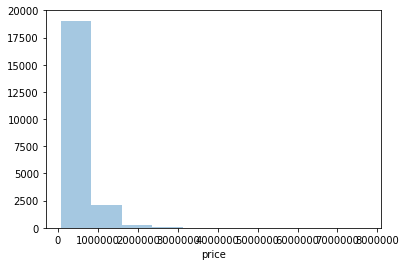

In [174]:
#Herstogram of Sales Price, terribly skewed. :' (
sns.distplot(df['price'], bins=10, kde=False);

In [175]:
#But how skewed is it?
print('Skewness: %f' % df['price'].skew())

Skewness: 4.023365


In [6]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [101]:
# Creating training sample
train_amt = int(0.75*len(df))
train_df = df.sample(train_amt)

In [102]:
# Creating testing sample
test_amt = len(df) - train_amt
test_df = df.sample(test_amt)

## Correlation Analysis

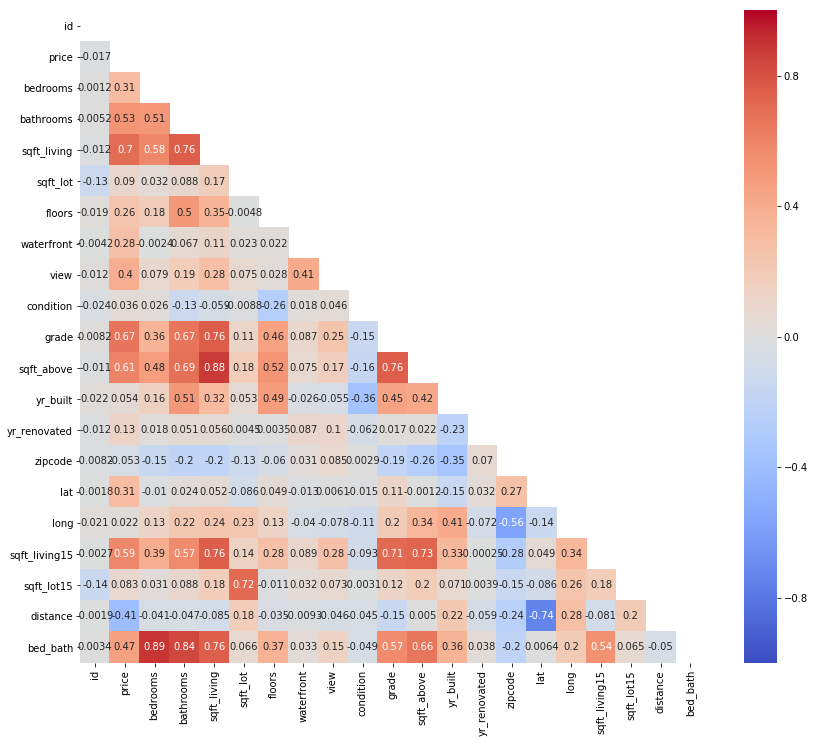

In [63]:
correlation = df.corr()
plt.figure(figsize=(14,12))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
heatmap = sns.heatmap(correlation, mask=mask, annot=True, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [107]:
train_df1 = train_df[['price', 'sqft_living', 'distance', 'grade', 'bathrooms', 'view']]

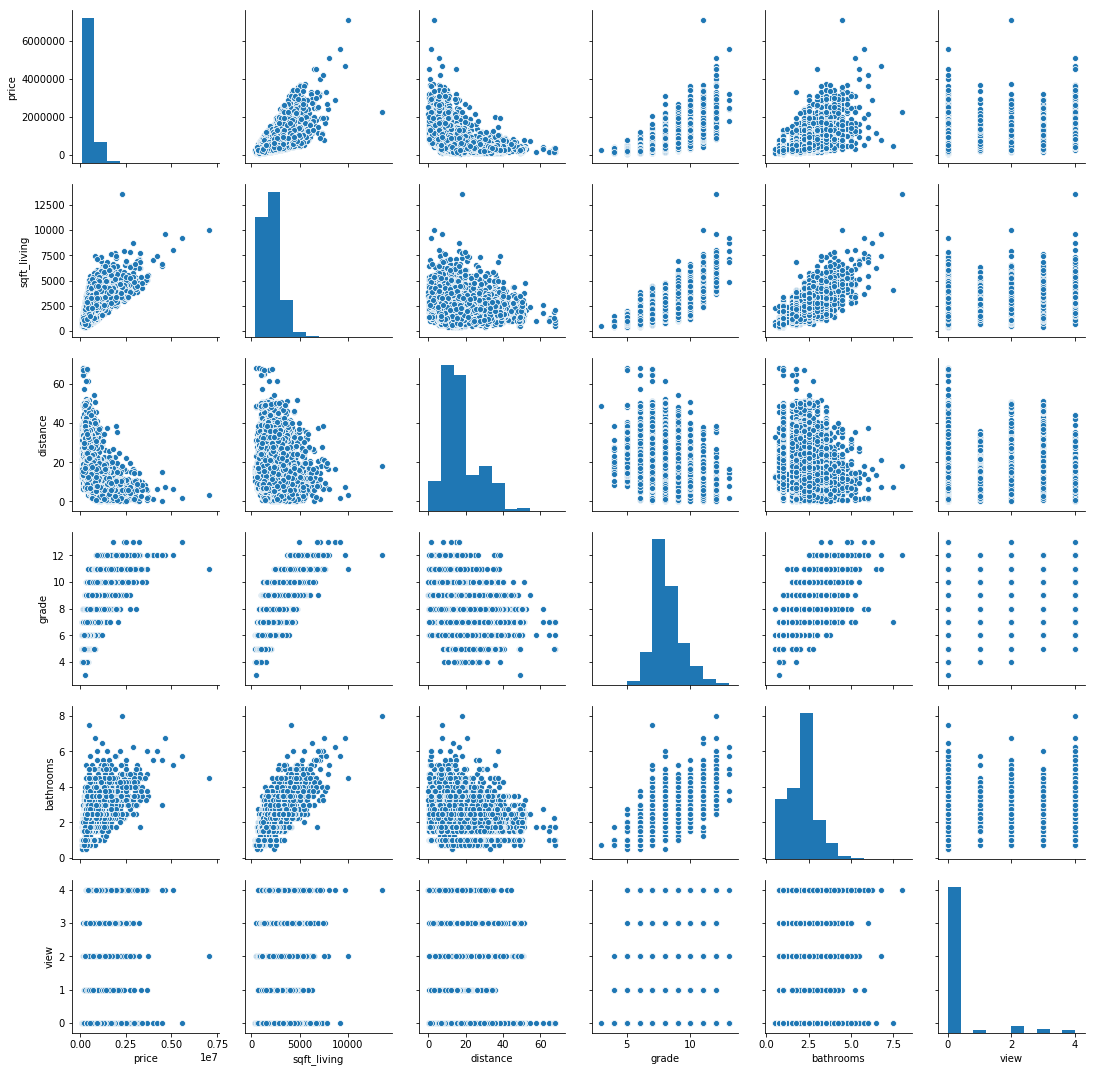

In [108]:
sns.pairplot(train_df1)

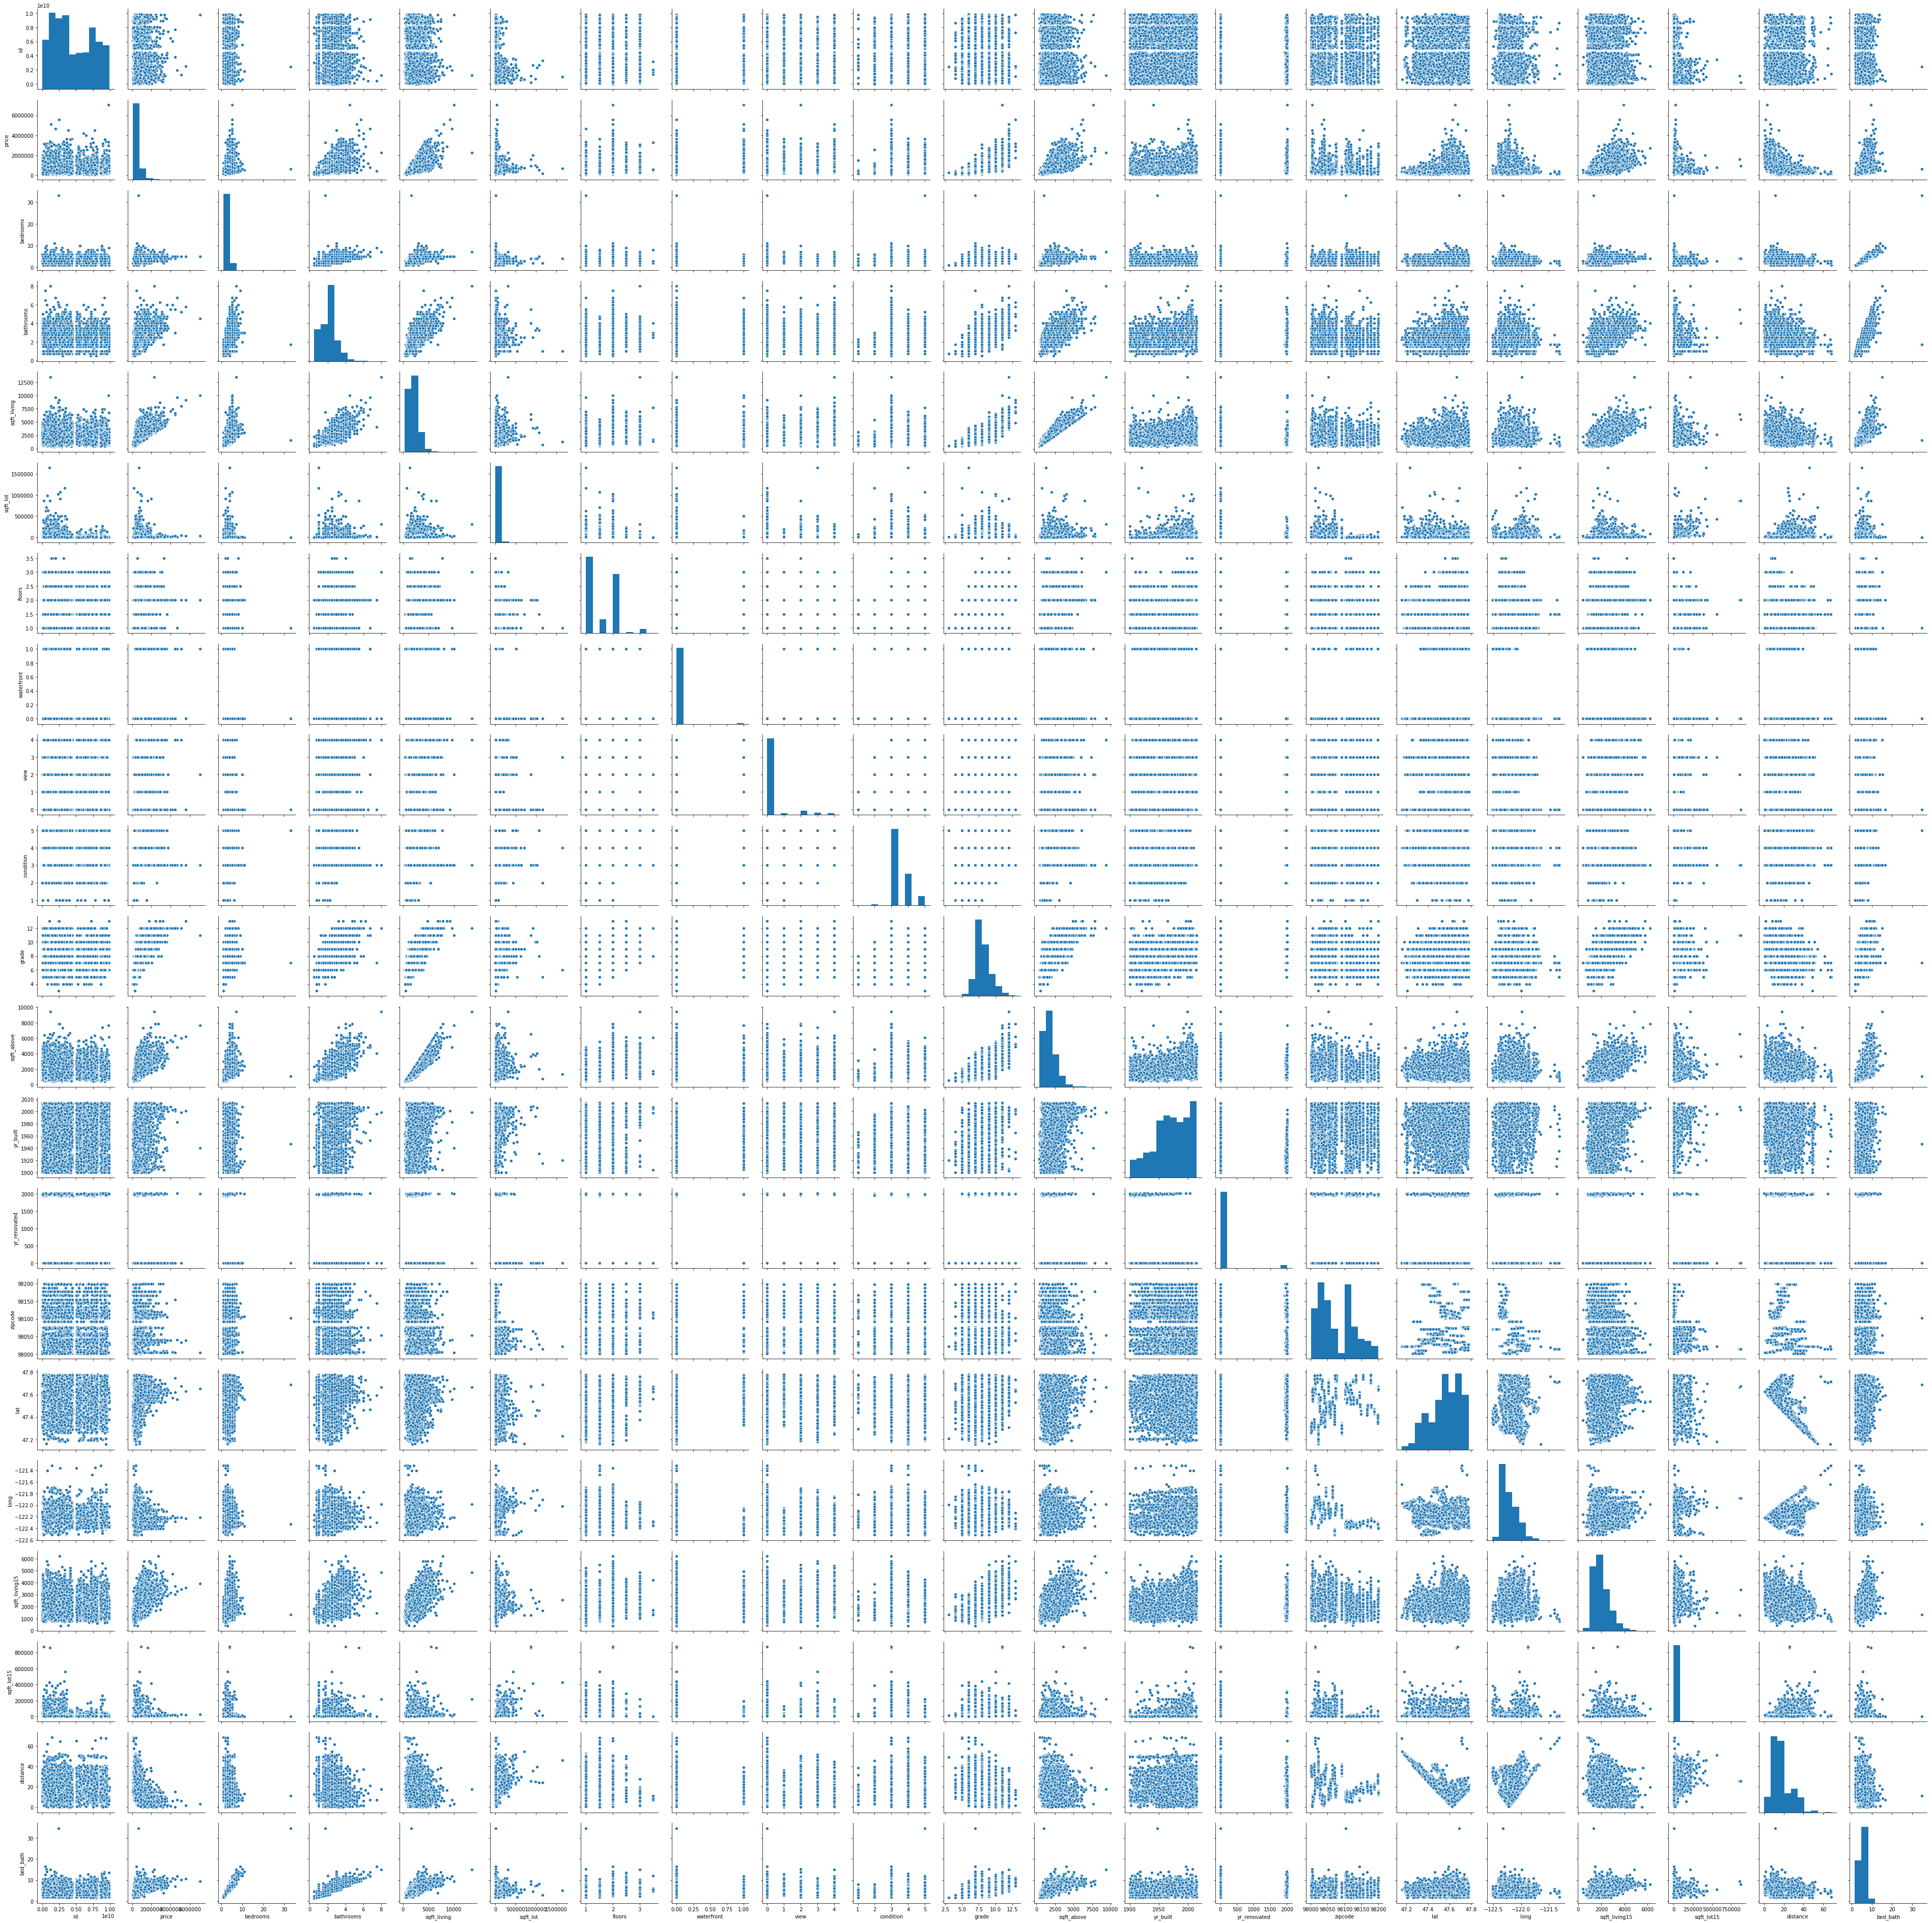

In [109]:
sns.pairplot(train_df)

In [ ]:
## There's a variable called 'Distance' which I derived from the 
## latitude and longitude coordinates. Below is my process. 

In [9]:
# Looking for clusters of "rich" neighborhoods, 
# I determined the cutoff for the top 10% of house prices
rich_houses = df.loc[df['price'] >= 888000]
rich_houses_list = list(rich_houses['price'])
print(rich_houses)

               id        date      price  bedrooms  bathrooms  sqft_living  \
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
26     1794500383   6/26/2014   937000.0         3       1.75         2450   
49      822039084   3/11/2015  1350000.0         3       2.50         2753   
54     4217401195    3/3/2015   920000.0         5       2.25         2730   
58     7922800400   8/27/2014   951000.0         5       3.25         3250   
66     3394100030    9/9/2014   975000.0         4       2.50         2720   
69     1802000060   6/12/2014  1330000.0         5       2.25         3200   
70     1525059190   9/12/2014  1040000.0         5       3.25         4770   
85     4232902595  11/14/2014   940000.0         3       1.50         2140   
91     5036300431   3/11/2015  1100000.0         5       2.75         3520   
95     1483300570    9/8/2014   905000.0         4       2.50   

In [10]:
# I determined the cutoff for the bottom 10% of house prices
poor_houses = df.loc[df['price'] <= 245000]
poor_houses_list = list(poor_houses['price'])
len(poor_houses)

2164

In [11]:
# Setting up lat variables and checking my work
rich_houses_lat = list(rich_houses.iloc[:,17])
poor_houses_lat = list(poor_houses.iloc[:,17])
print(rich_houses_lat[0])
print(poor_houses_lat[0])

47.6561
47.5112


In [12]:
# Setting up long variables and checking my work
rich_houses_long = list(rich_houses.iloc[:,18])
poor_houses_long = list(poor_houses.iloc[:,18])
print(rich_houses_long[0])
print(poor_houses_long[0])

-122.005
-122.257


In [13]:
# Setting up variables for the scatterplot
xr = rich_houses_long
yr = rich_houses_lat
xp = poor_houses_long
yp = poor_houses_lat
area = np.pi*2
colorsr = 'green'
colorsp = 'red'

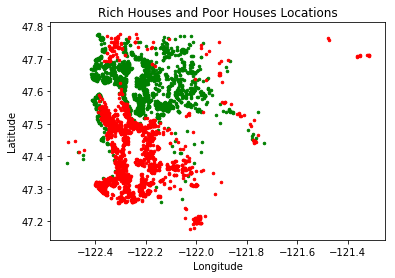

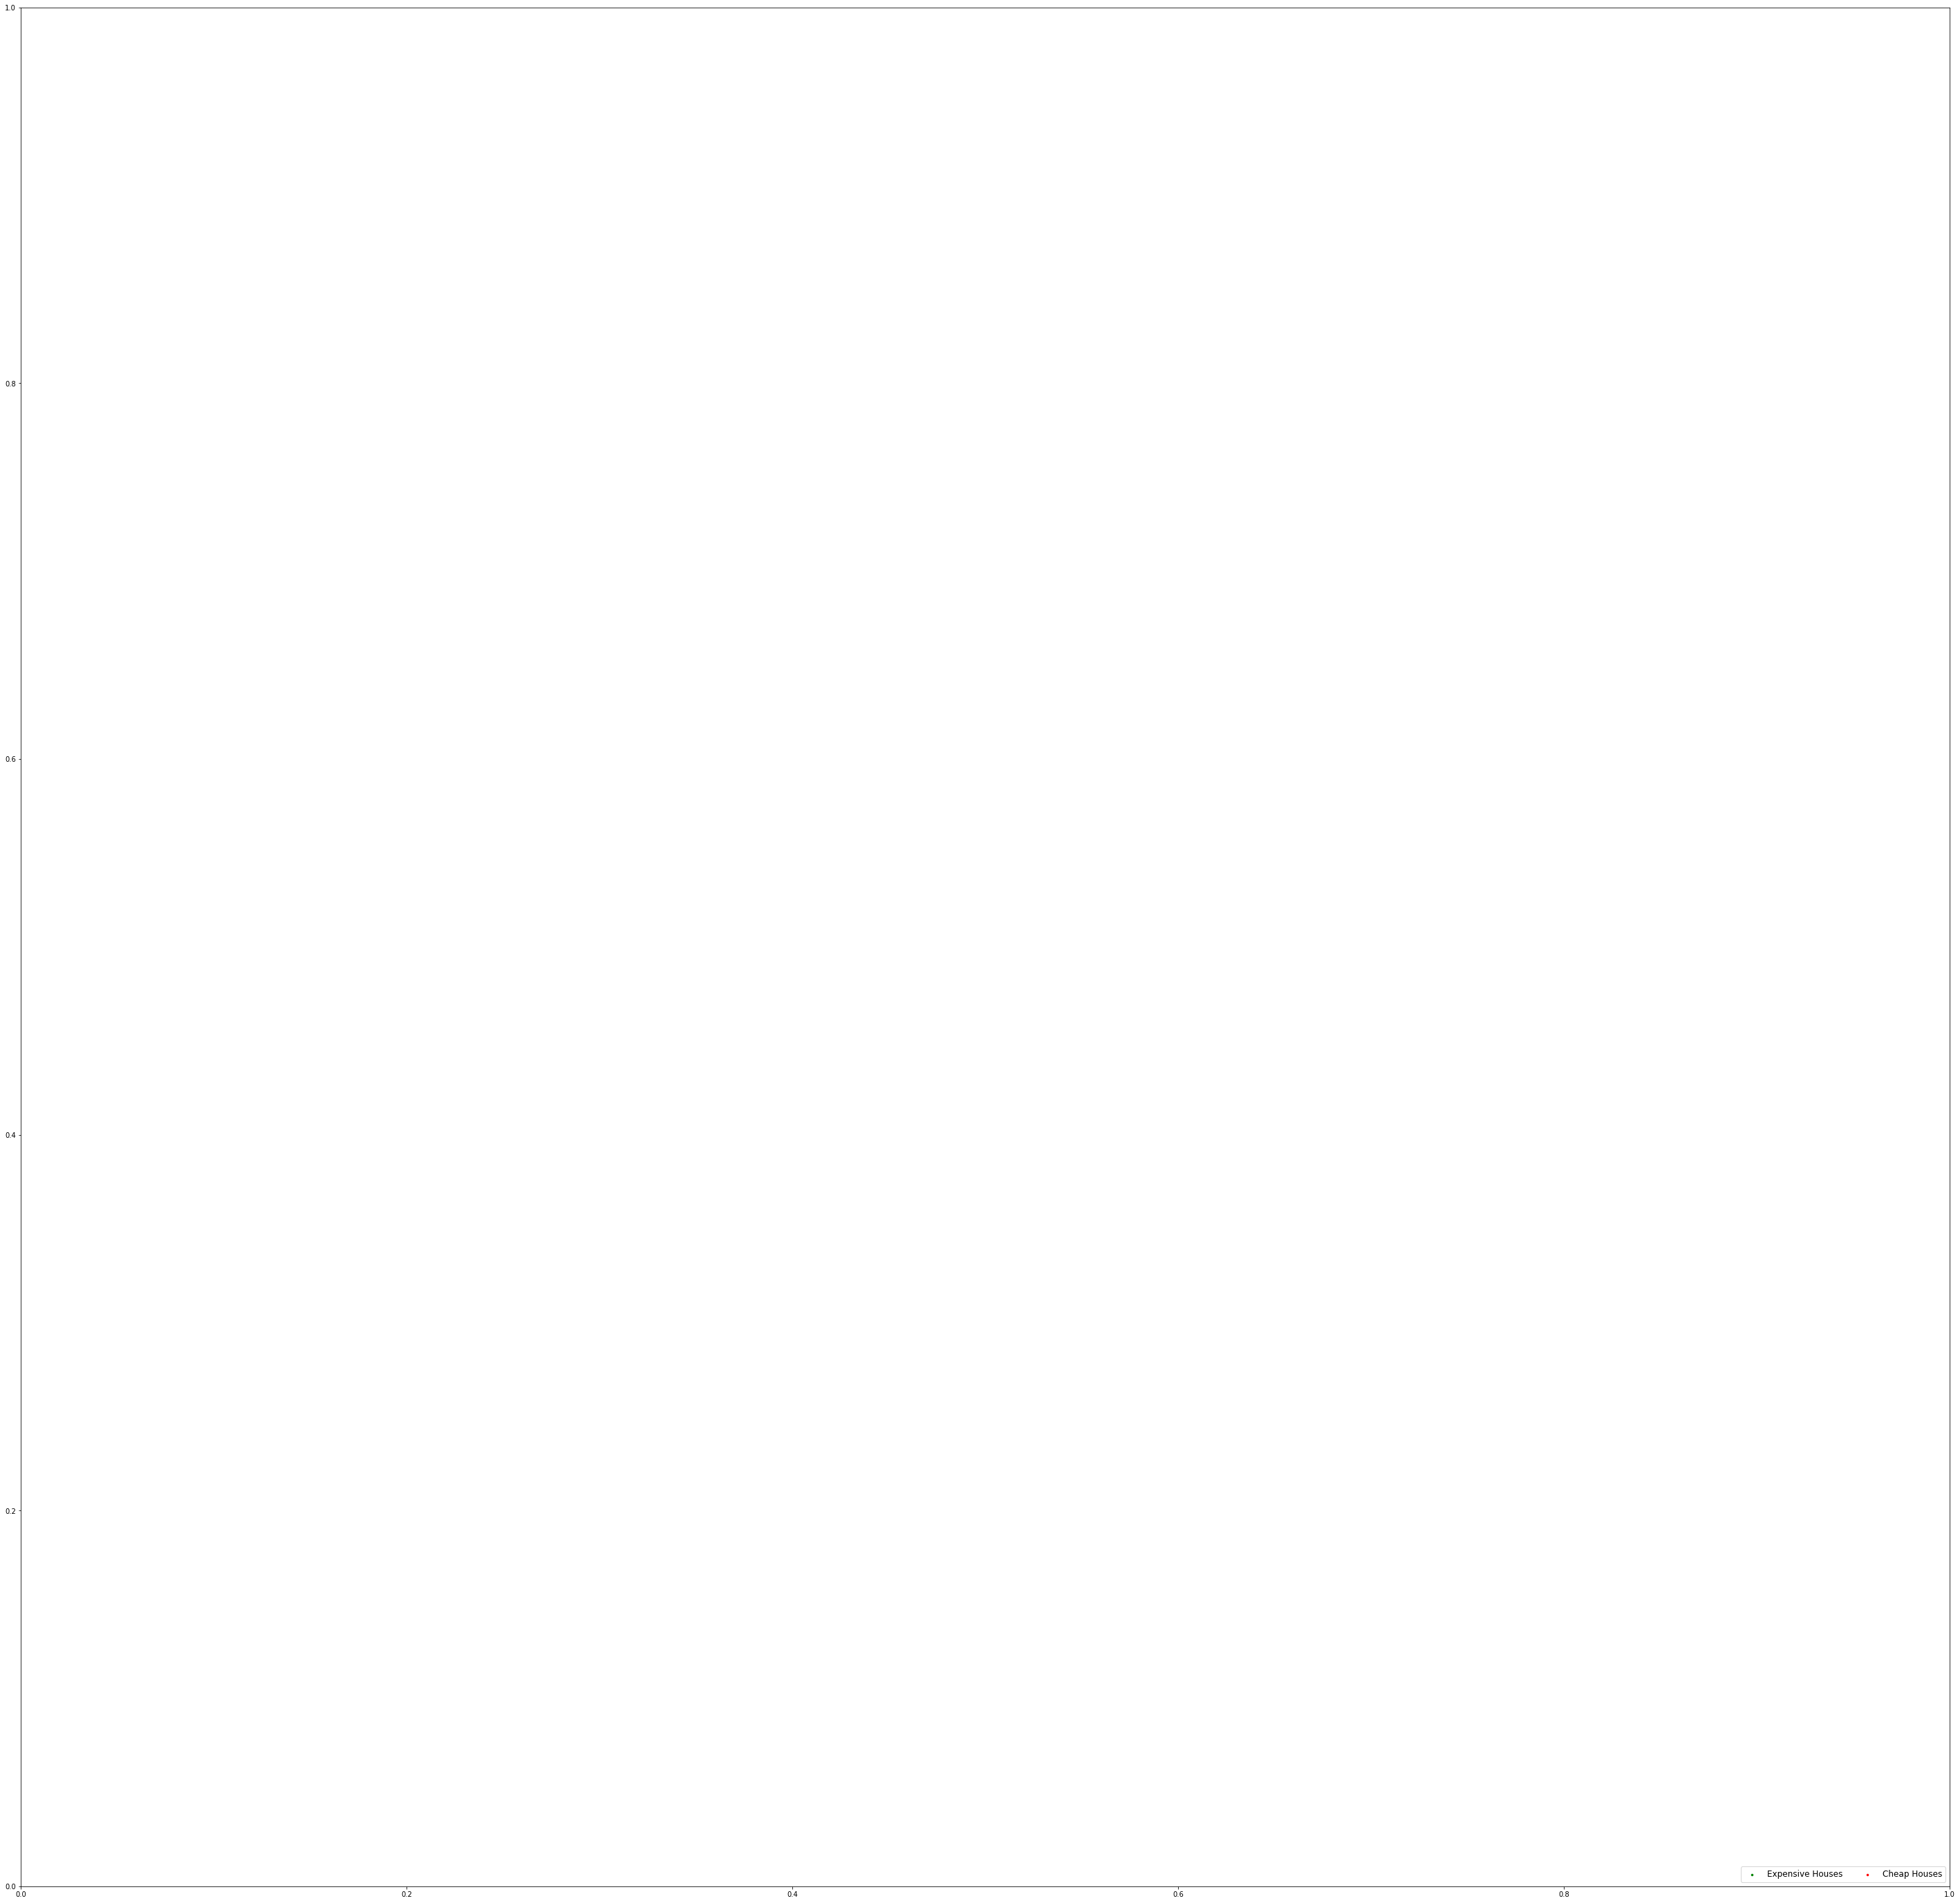

In [165]:
# Scatterplot configuration
%matplotlib inline
Expensive = plt.scatter(xr,yr, s=area, c=colorsr, alpha=1)
Cheap = plt.scatter(xp, yp, s=area, c=colorsp, alpha=1)
plt.title('Rich Houses and Poor Houses Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.figure(figsize=(50,50))

plt.legend((Expensive, Cheap),
          ('Expensive Houses', 'Cheap Houses'),
          scatterpoints=1,
          loc='lower right',
          ncol=3,
          fontsize=12);
plt.show()

In [15]:
# Let's overlay a map with the scatterplot
data = [
    go.Scattermapbox(
        lat = yr, 
        lon = xr,
        mode = 'markers',
        marker = go.scattermapbox.Marker(
            size = 5,  
            color = 'rgb(0, 128, 0)',
            opacity = 0.8
        ),
        text = rich_houses_list,
        hoverinfo= None
        ),
        
    go.Scattermapbox(
        lat = yp, 
        lon = xp,
        mode = 'markers', 
        marker = go.scattermapbox.Marker(
            size = 5, 
            color = 'rgb(255, 0, 0)',
            opacity = 0.8
        ),
        text = poor_houses_list,
        hoverinfo= None
    )]  
                                                
    
layout = go.Layout(title = 'Rich and Poor Houses in King County',
                   autosize = True,
                   hovermode = 'closest',
                   showlegend = False,
                   mapbox = dict(accesstoken = mapbox_access_token,
                                 bearing = 0,
                                 center = dict(lat = 47.61, lon = -122.1),
                                 pitch = 0,
                                 zoom = 9.5,
                                 style = 'light'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='King_County')

In [83]:
# Since there seems to be concentrations of wealth and poverty, 
# I decided to derive a variable called distance
# from an arbitrary center point of wealth, the "epicenter," 
# which is calculated using the Haversine Formula below

from numpy import sin, cos, sqrt, arctan2, radians, arcsin

# approximate radius of earth in km. Use 3956 for miles
R = 6373.0

# Should think of a more exact or precise way to 
# find the epicenter

lat1 = radians(df['lat'])
lon1 = radians(df['long'])
lat2 = radians(47.6224)
lon2 = radians(-122.215)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * arctan2(sqrt(a), sqrt(1 - a))

distance = R * c

print(distance)

0        12.764087
1        13.452068
2        12.917570
3        17.496837
4        12.760863
5        16.178930
6        35.786630
7        24.843833
8        15.290748
9        31.454887
10        5.777377
11        9.477269
12       14.875041
13       12.791735
14       14.420699
15       13.274280
16       22.276086
17       10.688996
18       34.872580
19       32.767396
20       12.979778
21       10.189580
22       33.083043
23       30.157683
24       27.828857
25       35.327315
26       11.017379
27        7.422168
28       10.472291
29       12.289999
           ...    
21567     8.799878
21568    14.342244
21569    34.270030
21570    13.549899
21571    14.241452
21572    13.369962
21573    34.075462
21574    11.587812
21575    13.663121
21576    10.435849
21577    10.007618
21578    28.700787
21579    10.402425
21580    16.821147
21581     6.379510
21582    36.812892
21583    14.488202
21584     1.558358
21585    11.274340
21586    38.312250
21587    26.725811
21588     8.

In [176]:
## Adding the data to my dataframe
df['distance_km'] = distance
df

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
2      5631500400   2/25/2015   180000.0         2       1.00          770   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
7      2008000270   1/15/2015   291850.0         3       1.50         1060   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
11     9212900260   5/27/2014   468000.0         2       1.00         1160   
12      114101516   5/28/2014   310000.0         3       1.00         1430   
13     6054650070   10/7/2014   400000.0         3       1.75         1370   
14     1175000570   3/12/2015   530000.0         5       2.00         1810   
15     9297300055   1/24/2015   650000.0         4       3.00         2950   
16     1875500060   7/31/2014   395000.0         3       2.00         1890   
17     6865200140   5/29/2014   485000.0         4       1.00         1600   
18       16000397   12/5/2014   189000.0         2       1.00         1200   
19     7983200060   4/24/2015   230000.0         3       1.00         1250   
20     6300500875   5/14/2014   385000.0         4       1.75         1620   
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
22     7137970340    7/3/2014   285000.0         5       2.50         2270   
23     8091400200   5/16/2014   252700.0         2       1.50         1070   
24     3814700200  11/20/2014   329000.0         3       2.25         2450   
25     1202000200   11/3/2014   233000.0         3       2.00         1710   
26     1794500383   6/26/2014   937000.0         3       1.75         2450   
27     3303700376   12/1/2014   667000.0         3       1.00         1400   
28     5101402488   6/24/2014   438000.0         3       1.75         1520   
29     1873100390    3/2/2015   719000.0         4       2.50         2570   
...           ...         ...        ...       ...        ...          ...   
21567  2025049203   6/10/2014   399950.0         2       1.00          710   
21568   952006823   12/2/2014   380000.0         3       2.50         1260   
21569  3832050760   8/28/2014   270000.0         3       2.50         1870   
21570  2767604724  10/15/2014   505000.0         2       2.50         1430   
21571  6632300207    3/5/2015   385000.0         3       2.50         1520   
21572  2767600688  11/13/2014   414500.0         2       1.50         1210   
21573  7570050450   9/10/2014   347500.0         3       2.50         2540   
21574  7430200100   5/14/2014  1220000.0         4       3.50         4910   
21575  4140940150   10/2/2014   572000.0         4       2.75         2770   
21576  1931300412   4/16/2015   475000.0         3       2.25         1190   
21577  8672200110   3/17/2015  1090000.0         5       3.75         4170   
21578  5087900040  10/17/2014   350000.0         4       2.75         2500   
21579  1972201967  10/31/2014   520000.0         2       2.25         1530   
21580  7502800100   8/13/2014   679950.0         5       2.75         3600   
21581   191100405   4/21/2015  1580000.0         4       3.25         3410   
21582  8956200760  10/13/2014   541800.0         4       2.50         3118   
21583  7202300110   9/15/2014   810000.0         4       3.00         3990   
21584   249000205  10/15/2014  1540000.0         5       3.75         4470   
21585  5100403806    4/7/2015   467000.0         3       2.50         1425   
21586   844000965   6/26/2014   22400

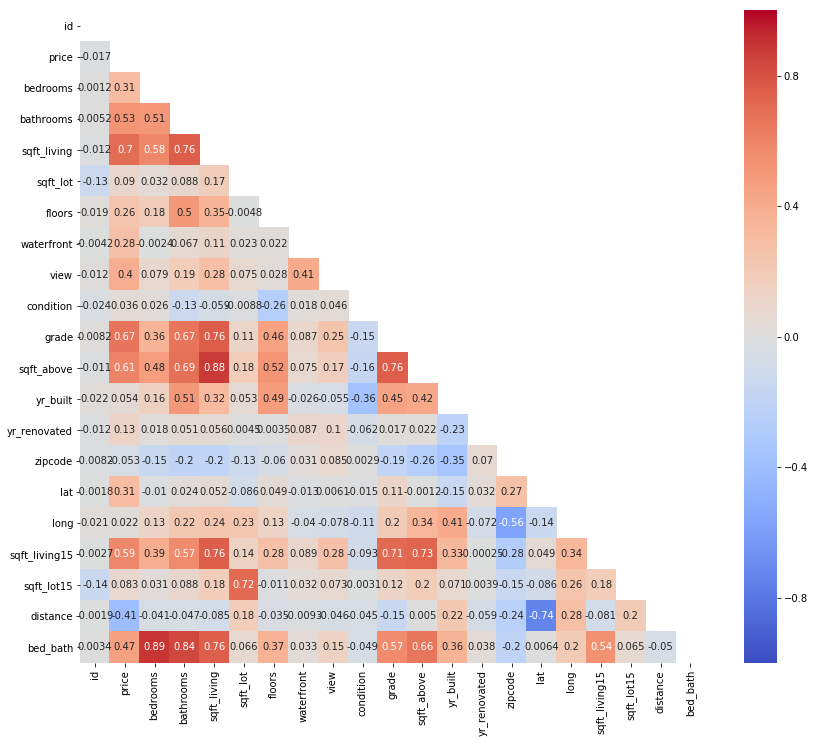

In [85]:
correlation = df.corr()
plt.figure(figsize=(14,12))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [86]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bed_bath         0.467376
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
distance        -0.410444
Name: price, dtype: float64

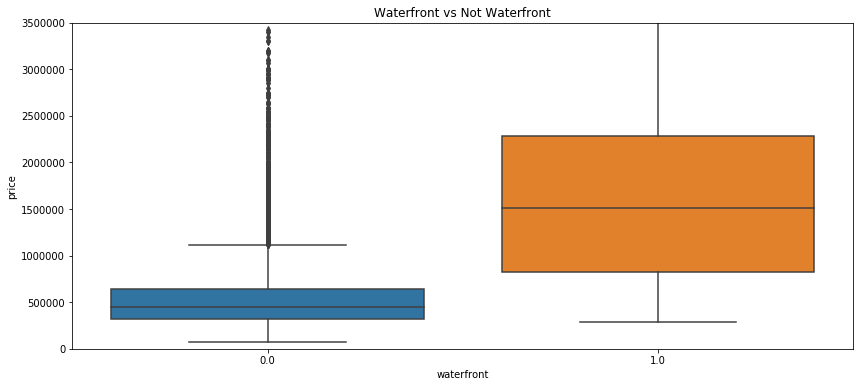

In [76]:
var = 'waterfront'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Waterfront vs Not Waterfront')
fig.axis(ymin=0, ymax=3500000);

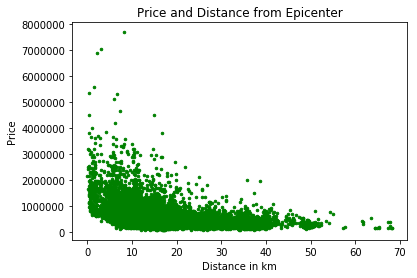

<Figure size 3600x3600 with 0 Axes>

In [87]:
%matplotlib inline

x = df['distance']
y = df['price']
area = np.pi*2

plt.scatter(x,y, s=area, c=colorsr, alpha=1)
plt.title('Price and Distance from Epicenter')
plt.xlabel('Distance in km')
plt.ylabel('Price')
plt.figure(figsize=(50,50));
plt.show()

Creating a function for an adjusted  R-squared will be useful later. The R-squared value increases as the number of features increases. We can use this evaluator to measure performance between different models.

In [70]:
def adjustedR2(r2, n, k):
    return r2-(k-1)/(n-k)*(1-r2)

Let's begin our analysis with a simple linear regression comparing price and our strongest correlated factor: "sqft_living"

In [88]:
def calc_slope(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
        ((np.mean(xs)**2) - np.mean(xs*xs)))
    return m

calc_slope(df['sqft_living'], df['price'])

280.863014358875

In [91]:
def best_fit(xs,ys):
    m = calc_slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

m, c = best_fit(df['sqft_living'], df['price'])
m, c

(280.863014358875, -43988.89219422813)

In [92]:
# y = 280.86x - 43988.89
def reg_line (m, c, xs):
    return [(m*x) + c for x in xs]
regression_line = reg_line(m,c,df['sqft_living'])

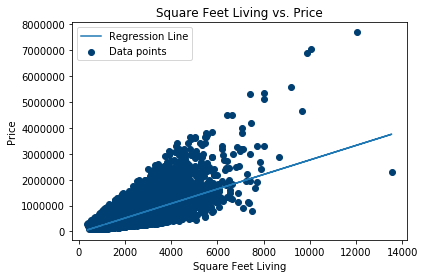

In [95]:
plt.scatter(df['sqft_living'], df['price'], color='#003F72', label='Data points')
plt.plot(df['sqft_living'], regression_line, label='Regression Line')
plt.legend()
plt.xlabel('Square Feet Living')
plt.ylabel('Price')
plt.title('Square Feet Living vs. Price')
plt.show()

In [110]:
# Let's see a linear regression of my variable distance with price
calc_slope(df['distance'], df['price'])

-15623.944890674444

In [111]:
m, c  = best_fit(df['distance'], df['price'])
m, c

(-15623.944890674444, 812637.9391394996)

In [112]:
regression_lineD = reg_line(m,c,df['distance'])

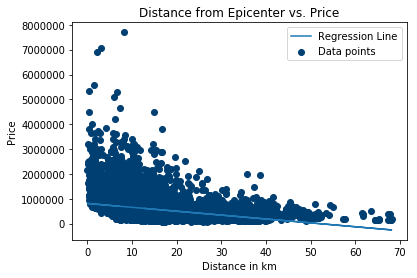

In [114]:
plt.scatter(df['distance'], df['price'], color='#003F72', label='Data points')
plt.plot(df['distance'], regression_lineD, label='Regression Line')
plt.legend()
plt.xlabel('Distance in km')
plt.ylabel('Price')
plt.title('Distance from Epicenter vs. Price')
plt.show()

In [291]:
grade_dummy = pd.get_dummies(train_df['grade'], prefix='grade')

In [292]:
grade_dummies = pd.concat([train_df, grade_dummy], axis=1)

In [293]:
grade_dummies.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'distance', 'bed_bath',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

In [295]:
grade_dummies['grade']

2385      7
19308    11
20233     8
20941     8
5049      8
20562    11
10558     7
12881     6
21257     9
7058      8
10701     8
11257     8
5327      7
14963     6
20400     7
13825     7
4208      8
10698     8
1971      6
5509      8
1570      7
7721      8
5196      7
9461      7
14029     6
17488     9
10726     8
7000      7
12191     7
16485     7
         ..
2605      8
16141     7
8640      6
16944     6
1961      8
21245     9
4785      6
18238     9
16263     7
5267      7
14116     6
12922     8
45        8
5161      9
12994     8
13623     8
21300    11
14031     8
8080      6
20820     9
14505     7
20014     9
10050     8
5002      6
7970      9
11777     6
13755     8
20322     7
18528    10
9215      8
Name: grade, Length: 16197, dtype: int64

In [346]:
grade_dummies.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
2385   8581200160  10/24/2014   193000.0         3        1.5         1180   
19308  5553300375   8/20/2014  2160000.0         3        3.5         3080   
20233  7694200380   9/22/2014   329780.0         3        2.5         1730   
20941  5416510530  11/24/2014   379950.0         4        2.5         2580   
5049   4217400305   3/31/2015  1300000.0         4        2.5         3070   

       sqft_lot  floors  waterfront  view  ...  grade_4  grade_5  grade_6  \
2385       7000     1.0         NaN   0.0  ...        0        0        0   
19308      6495     2.0         0.0   3.0  ...        0        0        0   
20233      3600     2.0         0.0   0.0  ...        0        0        0   
20941      4818     2.0         0.0   0.0  ...        0        0        0   
5049       4000     2.0         0.0   0.0  ...        0        0        0   

      grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  
2385        1        0        0         0         0         0         0  
19308       0        0        0         0         1         0         0  
20233       0        1        0         0         0         0         0  
20941       0        1        0         0         0         0         0  
5049        0        1        0         0         0         0         0  

[5 rows x 34 columns]

In [297]:
# copy dataframe to a separate variable
homes_df = waterfront_dummies.copy()

In [298]:
homes_df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
2385   8581200160  10/24/2014   193000.0         3        1.5         1180   
19308  5553300375   8/20/2014  2160000.0         3        3.5         3080   
20233  7694200380   9/22/2014   329780.0         3        2.5         1730   
20941  5416510530  11/24/2014   379950.0         4        2.5         2580   
5049   4217400305   3/31/2015  1300000.0         4        2.5         3070   

       sqft_lot  floors  waterfront  view  ...  grade_6  grade_7  grade_8  \
2385       7000     1.0         NaN   0.0  ...        0        1        0   
19308      6495     2.0         0.0   3.0  ...        0        0        0   
20233      3600     2.0         0.0   0.0  ...        0        0        1   
20941      4818     2.0         0.0   0.0  ...        0        0        1   
5049       4000     2.0         0.0   0.0  ...        0        0        1   

      grade_9  grade_10  grade_11  grade_12  grade_13  waterfront_0.0  \
2385        0         0         0         0         0               0   
19308       0         0         1         0         0               1   
20233       0         0         0         0         0               1   
20941       0         0         0         0         0               1   
5049        0         0         0         0         0               1   

       waterfront_1.0  
2385                0  
19308               0  
20233               0  
20941               0  
5049                0  

[5 rows x 15757 columns]

# Price ~ Square Feet Living

In [299]:
# Set up the formula with sqft living
sqft1 = "price~sqft_living"

In [300]:
# Set up the model using StatsModel
sqft_model = ols(formula=sqft1, data=homes_df).fit()

In [301]:
sqft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                 1.540e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:12:46   Log-Likelihood:            -2.2504e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.523e+04   5083.125     -6.931      0.000   -4.52e+04   -2.53e+04
sqft_living   276.7866      2.231    124.089      0.000     272.414     281.159
==============================================================================
Omnibus:                    10191.312   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           256124.869
Skew:                           2.604   Prob(JB):                         0.00
Kurtosis:                      21.772   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Price~Distance 

In [302]:

# Set up the formula with distance
distance = "price~distance"

In [303]:
distance_model = ols(formula=distance, data=homes_df).fit()

In [304]:
distance_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3318.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:12:47   Log-Likelihood:            -2.2895e+05
No. Observations:               16197   AIC:                         4.579e+05
Df Residuals:                   16195   BIC:                         4.579e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.149e+05   5418.762    150.383      0.000    8.04e+05    8.26e+05
distance    -1.57e+04    272.624    -57.605      0.000   -1.62e+04   -1.52e+04
==============================================================================
Omnibus:                    13640.246   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           631688.123
Skew:                           3.800   Prob(JB):                         0.00
Kurtosis:                      32.635   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Price~Grade

In [305]:
grade = "price~grade"

In [306]:
grade_model = ols(formula=grade, data = homes_df).fit()

In [307]:
grade_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.303e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:12:48   Log-Likelihood:            -2.2567e+05
No. Observations:               16197   AIC:                         4.514e+05
Df Residuals:                   16195   BIC:                         4.514e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.053e+06   1.41e+04    -74.524      0.000   -1.08e+06   -1.03e+06
grade       2.082e+05   1823.791    114.166      0.000    2.05e+05    2.12e+05
==============================================================================
Omnibus:                    13264.692   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           769669.790
Skew:                           3.543   Prob(JB):                         0.00
Kurtosis:                      36.019   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Price~Bathroom

In [308]:
bathrooms = "price~bathrooms"

In [309]:
bathrooms_model = ols(formula=bathrooms, data=homes_df).fit()

In [310]:
bathrooms_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     5965.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:12:49   Log-Likelihood:            -2.2792e+05
No. Observations:               16197   AIC:                         4.558e+05
Df Residuals:                   16195   BIC:                         4.559e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.776e+04   7213.345      2.463      0.014    3624.391    3.19e+04
bathrooms   2.473e+05   3202.686     77.232      0.000    2.41e+05    2.54e+05
==============================================================================
Omnibus:                    12096.548   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           446429.719
Skew:                           3.216   Prob(JB):                         0.00
Kurtosis:                      27.903   Cond. No.                         7.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Price~Waterfront

In [311]:
waterfront = 'price~waterfront'

In [312]:
waterfront_model=ols(formula=waterfront, data=homes_df).fit()

In [313]:
waterfront_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1394.
Date:                Wed, 08 May 2019   Prob (F-statistic):          3.09e-291
Time:                        10:12:50   Log-Likelihood:            -2.0435e+05
No. Observations:               14396   AIC:                         4.087e+05
Df Residuals:                   14394   BIC:                         4.087e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.329e+05   2958.837    180.114      0.000    5.27e+05    5.39e+05
waterfront  1.241e+06   3.32e+04     37.332      0.000    1.18e+06    1.31e+06
==============================================================================
Omnibus:                    10279.162   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           271085.892
Skew:                           3.124   Prob(JB):                         0.00
Kurtosis:                      23.320   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Price~Waterfront+Sqft Living

In [314]:
waterfront_sqftliving = 'price~waterfront+sqft_living'

In [315]:
waterfront_sqftliving_model = ols(formula=waterfront_sqftliving, data=homes_df).fit()

In [316]:
waterfront_sqftliving_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     8376.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:12:50   Log-Likelihood:            -1.9946e+05
No. Observations:               14396   AIC:                         3.989e+05
Df Residuals:                   14393   BIC:                         3.989e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -2.76e+04   5184.321     -5.324      0.000   -3.78e+04   -1.74e+04
waterfront   8.966e+05   2.39e+04     37.591      0.000     8.5e+05    9.43e+05
sqft_living   269.9742      2.282    118.330      0.000     265.502     274.446
==============================================================================
Omnibus:                     7679.789   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143012.453
Skew:                           2.149   Prob(JB):                         0.00
Kurtosis:                      17.831   Cond. No.                     2.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Price~Grade+Sqft_Living

In [317]:
grade_sqftliving = 'price~grade+sqft_living'

In [318]:
grade_sqftliving_model = ols(formula=grade_sqftliving, data=homes_df).fit()

In [319]:
grade_sqftliving_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     9197.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:12:51   Log-Likelihood:            -2.2431e+05
No. Observations:               16197   AIC:                         4.486e+05
Df Residuals:                   16194   BIC:                         4.486e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.064e+05   1.54e+04    -39.481      0.000   -6.36e+05   -5.76e+05
grade        1.012e+05   2581.733     39.200      0.000    9.61e+04    1.06e+05
sqft_living   178.9268      3.283     54.505      0.000     172.492     185.361
==============================================================================
Omnibus:                    11517.419   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           429980.290
Skew:                           2.974   Prob(JB):                         0.00
Kurtosis:                      27.530   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Price~Distance+SqFt

In [320]:
distance_sqft = 'price~distance+sqft_living'

In [321]:
#Set up model w/StatsModel
distance_sqft_model = ols(formula=distance_sqft, data=homes_df).fit()

In [322]:
distance_sqft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 1.279e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:12:53   Log-Likelihood:            -2.2278e+05
No. Observations:               16197   AIC:                         4.456e+05
Df Residuals:                   16194   BIC:                         4.456e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.252e+05   5704.684     39.475      0.000    2.14e+05    2.36e+05
distance    -1.351e+04    187.039    -72.229      0.000   -1.39e+04   -1.31e+04
sqft_living   264.6433      1.947    135.910      0.000     260.827     268.460
==============================================================================
Omnibus:                    12180.187   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           521183.297
Skew:                           3.194   Prob(JB):                         0.00
Kurtosis:                      30.045   Cond. No.                     7.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Price~ Distance+SqFt+Waterfront

In [323]:
# Set up the formula
distance_sqft_waterfront = 'price~distance+sqft_living+waterfront'

In [324]:
# Set up the model
distance_sqft_waterfront_model = ols(formula=distance_sqft_waterfront, data=homes_df).fit()

In [325]:
distance_sqft_waterfront_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     9320.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:12:57   Log-Likelihood:            -1.9724e+05
No. Observations:               14396   AIC:                         3.945e+05
Df Residuals:                   14392   BIC:                         3.945e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.343e+05   5744.954     40.782      0.000    2.23e+05    2.46e+05
distance    -1.354e+04    188.136    -71.975      0.000   -1.39e+04   -1.32e+04
sqft_living   257.5350      1.964    131.120      0.000     253.685     261.385
waterfront   8.938e+05   2.05e+04     43.696      0.000    8.54e+05    9.34e+05
==============================================================================
Omnibus:                     9320.748   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           293713.596
Skew:                           2.633   Prob(JB):                         0.00
Kurtosis:                      24.493   Cond. No.                     2.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Price~Distance+SqFt+Grade

In [326]:
#Set up formula
distance_sqft_grade = "price~distance+sqft_living+grade"

In [327]:
#Set up the model
distance_sqft_grade_model = ols(formula=distance_sqft_grade, data=homes_df).fit()

In [328]:
distance_sqft_grade_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     9629.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:12:59   Log-Likelihood:            -2.2216e+05
No. Observations:               16197   AIC:                         4.443e+05
Df Residuals:                   16193   BIC:                         4.444e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.511e+05   1.44e+04    -17.467      0.000   -2.79e+05   -2.23e+05
distance    -1.271e+04    181.397    -70.093      0.000   -1.31e+04   -1.24e+04
sqft_living   186.3754      2.877     64.771      0.000     180.735     192.016
grade        8.168e+04   2278.524     35.849      0.000    7.72e+04    8.61e+04
==============================================================================
Omnibus:                    13623.673   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           839390.250
Skew:                           3.679   Prob(JB):                         0.00
Kurtosis:                      37.491   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Price~Distance+Waterfront+Grade'

In [329]:
#Set up formula
distance_waterfront_grade = 'price~distance+waterfront+grade'

In [330]:
distance_waterfront_grade_model = ols(formula=distance_waterfront_grade, data=homes_df).fit()

In [331]:
distance_waterfront_grade_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     7248.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:13:04   Log-Likelihood:            -1.9839e+05
No. Observations:               14396   AIC:                         3.968e+05
Df Residuals:                   14392   BIC:                         3.968e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.944e+05    1.4e+04    -49.621      0.000   -7.22e+05   -6.67e+05
distance   -1.235e+04    205.093    -60.213      0.000   -1.28e+04   -1.19e+04
waterfront  9.879e+05   2.21e+04     44.748      0.000    9.45e+05    1.03e+06
grade       1.886e+05   1682.763    112.056      0.000    1.85e+05    1.92e+05
==============================================================================
Omnibus:                    11656.775   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           707351.345
Skew:                           3.458   Prob(JB):                         0.00
Kurtosis:                      36.636   Cond. No.                         239.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Price~Distance+Sqft+Waterfront+All Dummy Variables

In [332]:
#Copy columns of interest into a separate dataframe
dummy_vars = grade_dummies.copy().columns.tolist()

In [333]:
#Join each element of the list with a plus for the formula
dummy_vars = '+'.join(dummy_vars)

In [334]:
dummy_vars

'id+date+price+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+distance+bed_bath+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13'

In [335]:
# Get rid of id and date--oops! Should have done that before but
# better to do it now instead of copying the entire list twice.
print(dummy_vars[8:])

price+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+distance+bed_bath+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13


In [336]:
#Set up the formula
dum_form = 'price~{}'.format(dummy_vars)

In [337]:
# Set up the model using Statsmodel
dummy_model = ols(formula=dum_form, data=waterfront_dummies).fit()

In [340]:
dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.366e+29
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:13:41   Log-Likelihood:             2.2020e+05
No. Observations:               11811   AIC:                        -4.391e+05
Df Residuals:                   11161   BIC:                        -4.343e+05
Df Model:                         649                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -3.632e-08   2.49e-08     -1.460      0.144   -8.51e-08    1.24e-08
date[T.1/12/2015]         2.91e-09   2.03e-09      1.431      0.153   -1.08e-09     6.9e-09
date[T.1/13/2015]       -3.871e-09   2.03e-09     -1.906      0.057   -7.85e-09    1.09e-10
date[T.1/14/2015]        4.045e-09   2.02e-09      2.002      0.045    8.49e-11    8.01e-09
date[T.1/15/2015]       -1.892e-09   2.03e-09     -0.932      0.351   -5.87e-09    2.09e-09
date[T.1/16/2015]        2.008e-09   2.02e-09      0.992      0.321   -1.96e-09    5.98e-09
date[T.1/17/2015]       -6.694e-09   2.82e-09     -2.371      0.018   -1.22e-08   -1.16e-09
date[T.1/19/2015]       -7.392e-09   2.23e-09     -3.308      0.001   -1.18e-08   -3.01e-09
date[T.1/2/2015]        -3.929e-10   2.03e-09     -0.194      0.847   -4.37e-09    3.59e-09
date[T.1/20/2015]        4.991e-09   2.04e-09      2.452      0.014       1e-09    8.98e-09
date[T.1/21/2015]       -3.638e-09   2.02e-09     -1.798      0.072    -7.6e-09    3.28e-10
date[T.1/22/2015]        4.657e-09   2.03e-09      2.296      0.022    6.82e-10    8.63e-09
date[T.1/23/2015]       -4.628e-09   2.03e-09     -2.284      0.022    -8.6e-09   -6.56e-10
date[T.1/24/2015]         1.49e-08   2.45e-09      6.079      0.000    1.01e-08    1.97e-08
date[T.1/25/2015]        2.507e-08   2.45e-09     10.244      0.000    2.03e-08    2.99e-08
date[T.1/26/2015]        1.042e-08   2.03e-09      5.143      0.000    6.45e-09    1.44e-08
date[T.1/27/2015]       -2.648e-09   2.02e-09     -1.309      0.191   -6.61e-09    1.32e-09
date[T.1/28/2015]        2.954e-09   2.02e-09      1.461      0.144   -1.01e-09    6.92e-09
date[T.1/29/2015]        3.813e-09   2.03e-09      1.876      0.061    -1.7e-10     7.8e-09
date[T.1/30/2015]        4.657e-09   2.05e-09      2.274      0.023    6.42e-10    8.67e-09
date[T.1/31/2015]       -1.291e-15   3.31e-16     -3.904      0.000   -1.94e-15   -6.43e-16
date[T.1/5/2015]          2.43e-09   2.02e-09      1.201      0.230   -1.54e-09     6.4e-09
date[T.1/6/2015]         4.657e-10   2.04e-09      0.228      0.820   -3.54e-09    4.47e-09
date[T.1/7/2015]         5.384e-09   2.02e-09      2.661      0.008    1.42e-09    9.35e-09
date[T.1/8/2015]         1.164e-10   2.04e-09      0.057      0.954   -3.88e-09    4.11e-09
date[T.1/9/2015]         4.889e-09   2.03e-09      2.403      0.016    9.01e-10    8.88e-09
date[T.10/1/2014]         2.91e-09   2.02e-09      1.442      0.149   -1.05e-09    6.87e-09
date[T.10/10/2014]       2.445e-09   2.02e-09      1.212      0.226   -1.51e-09     6.4e-09
date[T.10/11/2014]       1.315e-08   2.45e-09      5.376      0.000    8.36e-09     1.8e-08
date[T.10/12/2014]      -1.804e-08   2.82e-09     -6.406      0.000   -2.36e-08   -1.25e-08
date[T.10/13/2014]       1.397e-09   2.03e-09  

In [341]:
homes_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view',
       ...
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'waterfront_0.0', 'waterfront_1.0'],
      dtype='object', length=15757)

# Final Linear Regression Model

In [348]:
grade_dummies

id        date      price  bedrooms  bathrooms  sqft_living  \
2385   8581200160  10/24/2014   193000.0         3       1.50         1180   
19308  5553300375   8/20/2014  2160000.0         3       3.50         3080   
20233  7694200380   9/22/2014   329780.0         3       2.50         1730   
20941  5416510530  11/24/2014   379950.0         4       2.50         2580   
5049   4217400305   3/31/2015  1300000.0         4       2.50         3070   
20562   424069279   3/28/2015  1180000.0         6       6.50         6260   
10558  8029550160   5/16/2014   433000.0         4       2.50         2280   
12881  7454001120  12/12/2014   285950.0         2       1.00          710   
21257  7628700050    3/9/2015   775000.0         3       2.50         3020   
7058   1898900280   9/19/2014   340000.0         4       3.00         2380   
10701  7214711260   10/1/2014   655000.0         4       2.50         3340   
11257  6909700340   8/20/2014   619000.0         3       2.00         1990   
5327   2946002140   8/12/2014   279000.0         3       1.50         1780   
14963  7011201087    8/4/2014   385000.0         3       1.75         1220   
20400   301400930   6/18/2014   267000.0         3       2.25         1584   
13825  8732130730  11/20/2014   280000.0         3       1.75         1770   
4208   2597500090    8/8/2014   270000.0         5       2.50         2630   
10698  8564700240  10/17/2014   575000.0         3       2.50         2610   
1971    952005224   11/5/2014   409000.0         2       1.00          890   
5509    238000244   6/17/2014   421000.0         3       2.50         2890   
1570   1245001820   4/29/2015   776500.0         4       1.50         2290   
7721   1826059042   9/23/2014   402000.0         3       2.50         1970   
5196   8857600680   3/13/2015   285900.0         5       1.50         1690   
9461   3260700360   9/19/2014   279000.0         3       2.50         1540   
14029  9141100210    9/8/2014   257000.0         2       1.00          770   
17488  3521069150  10/17/2014   431000.0         3       2.50         2440   
10726  7525100060   8/20/2014   497000.0         4       2.25         2250   
7000   1761100190   7/24/2014   225000.0         3       2.25         1470   
12191  6385800030   4/22/2015   335000.0         4       2.25         2100   
16485  2025049028    6/9/2014   403950.0         2       1.00          710   
...           ...         ...        ...       ...        ...          ...   
2605   3904990030    7/9/2014   561000.0         4       2.50         2570   
16141  2558690130   8/13/2014   465000.0         4       2.25         2140   
8640   2768301490   6/26/2014   402000.0         2       1.00          620   
16944  6450301310  10/30/2014   225000.0         2       1.00          830   
1961   1721069036   5/29/2014   412000.0         3       1.75         1950   
21245  3524039224   5/13/2014   870000.0         4       2.50         3520   
4785   3024079069   9/11/2014   371000.0         4       1.00         1960   
18238   255520150    9/2/2014   539000.0         3       2.50         2830   
16263  2938100005   8/29/2014   264950.0         3       1.50         1370   
5267   4204400098   1/19/2015   250000.0         5       1.75         2190   
14116  3330500085   9/18/2014   366000.0         2       1.00         1210   
12922  3222049044   6/12/2014   835000.0         3       3.00         2790   
45     8035350320   7/18/2014   488000.0         3       2.50         3160   
5161   1853081060   4/16/2015   878000.0         4       2.50         3810   
12994  9264920620   12/9/2014   330000.0         4       2.25         2440   
13623  7852020620    3/3/2015   563500.0         4       2.50         2190   
21300  6600000050   3/10/2015  1700000.0         4       3.50         3950   
14031  1245000438   4/13/2015   885000.0         4       2.50         2620   
8080   7973202225    1/6/2015   154200.0         4       1.00         1310   
20820  3814900260    3/5/2015   40239

In [349]:
#Copy columns of interest into a separate dataframe
dummy_vars1=grade_dummies.copy().drop(['id', 'date'], axis=1).columns.tolist()

In [350]:
dummy_vars1

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'distance',
 'bed_bath',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13']

In [351]:
#Join each element of the list with a plus for the formula
dummy_vars1 = '+'.join(dummy_vars1)

In [352]:
dummy_vars1

'price+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+distance+bed_bath+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13'

In [353]:
#Set up the formula
dum_form1 = 'price~{}'.format(dummy_vars1)

In [355]:
#Set up the model using statsmodel
dummy_model1 = ols(formula=dum_form1, data=grade_dummies).fit()

In [356]:
dummy_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.131e+27
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:25:31   Log-Likelihood:             1.8677e+05
No. Observations:               11811   AIC:                        -3.730e+05
Df Residuals:                   11521   BIC:                        -3.708e+05
Df Model:                         289                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2.328e-10   4.09e-07      0.001      1.000   -8.01e-07    8.02e-07
sqft_basement[T.10.0]   -4.351e-08   3.33e-08     -1.308      0.191   -1.09e-07    2.17e-08
sqft_basement[T.100.0]  -4.031e-09   6.69e-09     -0.602      0.547   -1.71e-08    9.09e-09
sqft_basement[T.1000.0] -2.037e-10   6.07e-09     -0.034      0.973   -1.21e-08    1.17e-08
sqft_basement[T.1008.0] -2.579e-08   3.36e-08     -0.767      0.443   -9.17e-08    4.01e-08
sqft_basement[T.1010.0]  3.914e-09   7.29e-09      0.537      0.591   -1.04e-08    1.82e-08
sqft_basement[T.1020.0] -2.699e-09   8.05e-09     -0.335      0.737   -1.85e-08    1.31e-08
sqft_basement[T.1024.0] -1.621e-08   3.37e-08     -0.481      0.630   -8.22e-08    4.98e-08
sqft_basement[T.1030.0] -2.154e-09   8.51e-09     -0.253      0.800   -1.88e-08    1.45e-08
sqft_basement[T.1040.0] -1.455e-10   8.11e-09     -0.018      0.986    -1.6e-08    1.57e-08
sqft_basement[T.1050.0] -6.112e-10   8.44e-09     -0.072      0.942   -1.72e-08    1.59e-08
sqft_basement[T.1060.0]  2.168e-09   7.57e-09      0.287      0.774   -1.27e-08     1.7e-08
sqft_basement[T.1070.0] -1.222e-09    8.1e-09     -0.151      0.880   -1.71e-08    1.47e-08
sqft_basement[T.1080.0]  7.043e-09   9.39e-09      0.750      0.453   -1.14e-08    2.55e-08
sqft_basement[T.1090.0]  7.429e-09   9.24e-09      0.804      0.421   -1.07e-08    2.55e-08
sqft_basement[T.110.0]   1.566e-08   1.18e-08      1.329      0.184   -7.44e-09    3.88e-08
sqft_basement[T.1100.0]  2.619e-09    7.3e-09      0.359      0.720   -1.17e-08    1.69e-08
sqft_basement[T.1110.0]  -2.91e-10   9.65e-09     -0.030      0.976   -1.92e-08    1.86e-08
sqft_basement[T.1120.0] -1.892e-09   8.65e-09     -0.219      0.827   -1.88e-08    1.51e-08
sqft_basement[T.1130.0] -2.583e-09   9.35e-09     -0.276      0.782   -2.09e-08    1.57e-08
sqft_basement[T.1140.0]  8.731e-10   9.94e-09      0.088      0.930   -1.86e-08    2.04e-08
sqft_basement[T.1150.0]  4.511e-10   1.02e-08      0.044      0.965   -1.95e-08    2.04e-08
sqft_basement[T.1160.0]  2.328e-10   1.24e-08      0.019      0.985   -2.41e-08    2.45e-08
sqft_basement[T.1170.0]  1.615e-09   9.63e-09      0.168      0.867   -1.73e-08    2.05e-08
sqft_basement[T.1180.0] -1.601e-09   1.05e-08     -0.152      0.879   -2.23e-08    1.91e-08
sqft_basement[T.1190.0] -1.077e-09   1.03e-08     -0.105      0.917   -2.13e-08    1.91e-08
sqft_basement[T.120.0]  -9.131e-10   6.84e-09     -0.134      0.894   -1.43e-08    1.25e-08
sqft_basement[T.1200.0]  1.426e-09   7.87e-09      0.181      0.856    -1.4e-08    1.68e-08
sqft_basement[T.1210.0] -2.561e-09   1.48e-08     -0.174      0.862   -3.15e-08    2.64e-08
sqft_basement[T.1220.0]  5.821e-10    9.6e-09      0.061      0.952   -1.82e-08    1.94e-08
sqft_basement[T.1230.0] -1.455e-11   9.98e-09  

In [388]:
dummy_vars2=['sqft_living', 'waterfront', 'view', 'distance']

In [389]:
#Join each element of the list with a plus for the formula
dummy_vars2 = '+'.join(dummy_vars2)

In [390]:
dummy_vars2

'sqft_living+waterfront+view+distance'

In [391]:
#Set up the formula
dum_form2 = 'price~{}'.format(dummy_vars2)

In [420]:
#Set up the model using StatsModel
dummy_mode12 = ols(formula=dum_form2, data=grade_dummies).fit()

In [421]:
dummy_mode12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     7482.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        11:26:34   Log-Likelihood:            -1.9635e+05
No. Observations:               14355   AIC:                         3.927e+05
Df Residuals:                   14350   BIC:                         3.928e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.468e+05   5643.070     43.736      0.000    2.36e+05    2.58e+05
sqft_living   243.4722      1.994    122.072      0.000     239.563     247.382
waterfront   6.666e+05   2.17e+04     30.650      0.000    6.24e+05    7.09e+05
view         6.837e+04   2579.640     26.502      0.000    6.33e+04    7.34e+04
distance    -1.341e+04    184.246    -72.777      0.000   -1.38e+04    -1.3e+04
==============================================================================
Omnibus:                     9651.067   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           386598.218
Skew:                           2.702   Prob(JB):                         0.00
Kurtosis:                      27.843   Cond. No.                     2.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predictions

### Predictions with 1st Model with Dummies

In [394]:
# make predictions using test data and put it in a pandas dataframe
preds = pd.DataFrame(dummy_model1.predict(), columns=['price_pred'])

In [395]:
preds.head()

price_pred
0   2160000.0
1    329780.0
2    433000.0
3    285950.0
4    340000.0

In [397]:
#pull out true data from the test sample for comparison
true = test_df.price.reset_index(drop=True)

In [398]:
true_pred = pd.concat([true, preds], axis=1)

In [399]:
true_pred.head()

price  price_pred
0  325000.0   2160000.0
1  546000.0    329780.0
2  451000.0    433000.0
3  465000.0    285950.0
4  395000.0    340000.0

In [400]:
#Calculate root mean squared error
rmse = ((true_pred.price - true_pred.price_pred) ** 2).mean() ** .5

In [401]:
# This indicates a fairly low accuracy when it comes to 
# predicting price. 
rmse


545007.4724053902

## Predictions with 2nd Model with Dummies

In [406]:
# Make predictions using test data and put it 
# in a pandas dataframe
preds2 = pd.DataFrame(dummy_mode12.predict(), columns=['price_pred'])

In [407]:
preds2.head()

price_pred
0  1.022294e+06
1  4.480260e+05
2  4.458210e+05
3  9.083680e+05
4  6.351764e+05

In [408]:
#Concatenate the true values and predicted values into on dataframe
true_pred2 = pd.concat([true, preds2], axis=1)

In [409]:
true_pred2.head()

price    price_pred
0  325000.0  1.022294e+06
1  546000.0  4.480260e+05
2  451000.0  4.458210e+05
3  465000.0  9.083680e+05
4  395000.0  6.351764e+05

In [410]:
#Calculate root mean squared error
rmse2 = ((true_pred2.price - true_pred2.price_pred) ** 2).mean() ** .5

In [411]:
rmse2

500488.05731557676

## Data Visualization

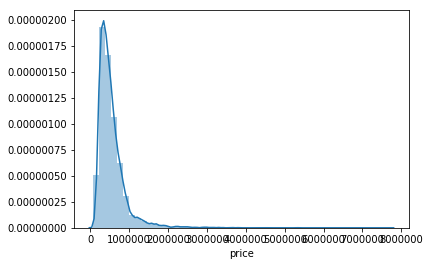

In [412]:
sns.distplot(df['price'])

In [413]:
true_pred.columns

Index(['price', 'price_pred'], dtype='object')

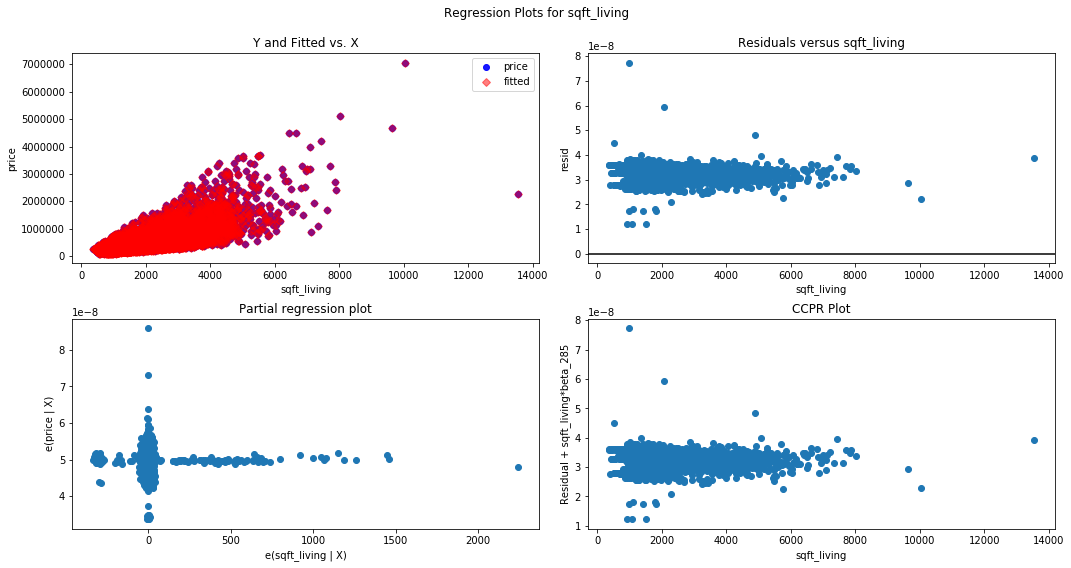

In [415]:
# plotting model 1 with sqft
fig1 = plt.figure(figsize=(15,8))
fig1 = sm.graphics.plot_regress_exog(dummy_model1, 'sqft_living', fig=fig1)
plt.show()

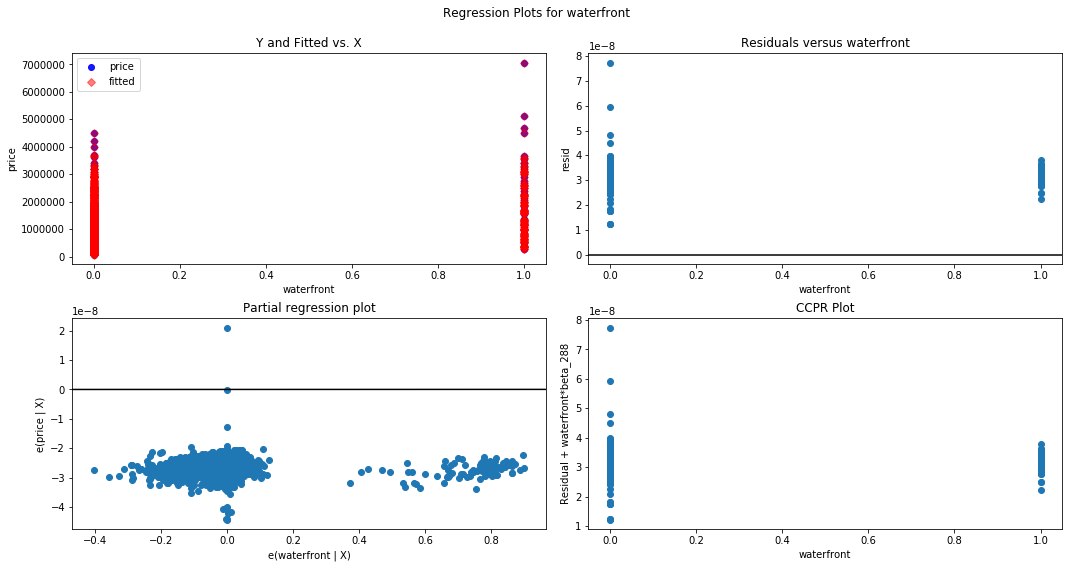

In [416]:
#plotting model 1 with waterfront
fig2 = plt.figure(figsize=(15,8))
fig2 = sm.graphics.plot_regress_exog(dummy_model1, 'waterfront', fig=fig2)
plt.show()

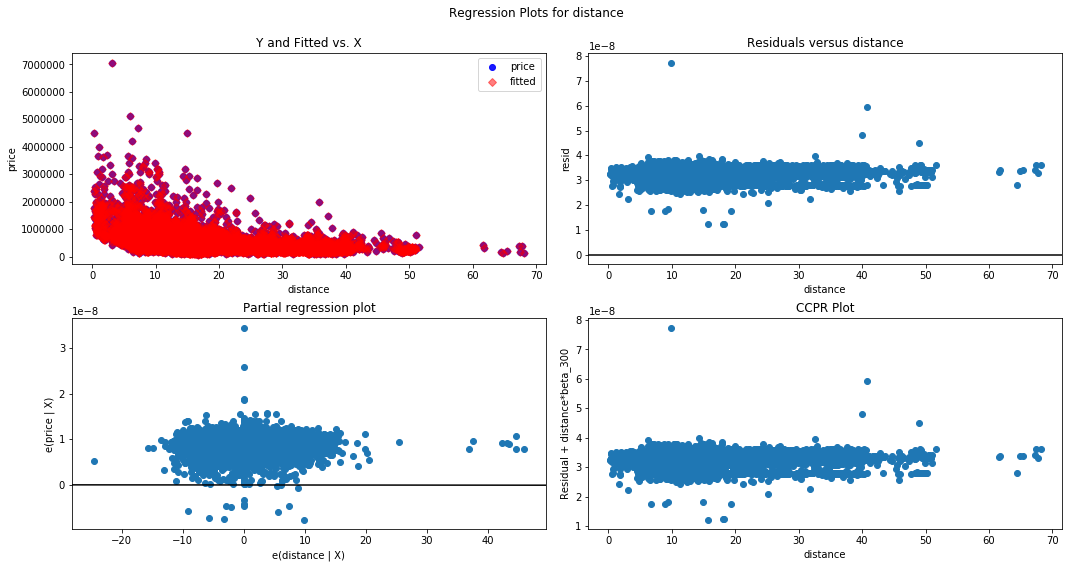

In [417]:
# plotting model 1 with distance
fig3 = plt.figure(figsize=(15,8))
fig3 = sm.graphics.plot_regress_exog(dummy_model1, 'distance', fig=fig3)
plt.show()

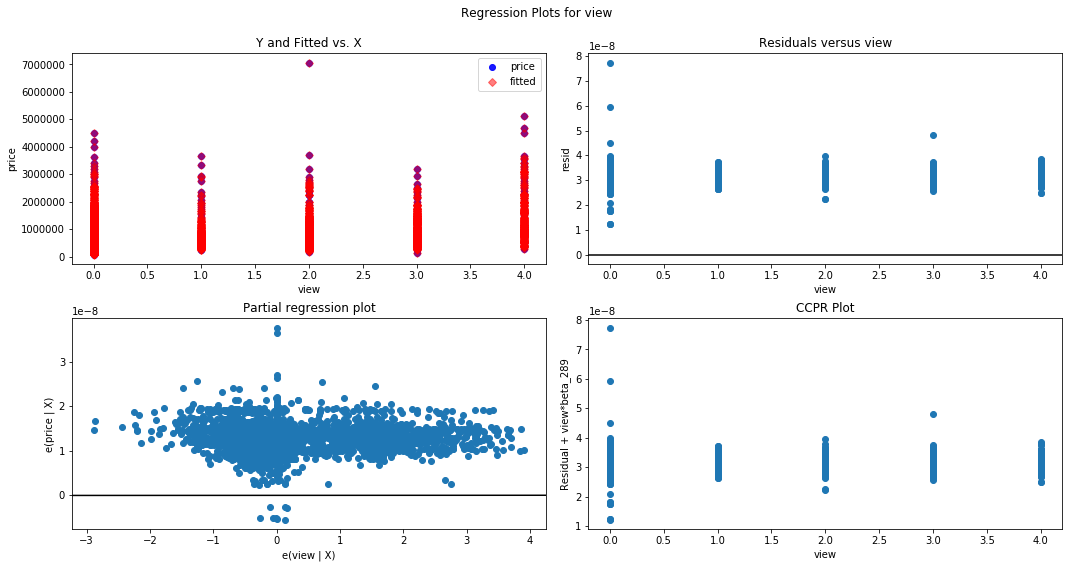

In [418]:
# plotting model 1 with view
fig4 = plt.figure(figsize=(15,8))
fig4 = sm.graphics.plot_regress_exog(dummy_model1, 'view', fig=fig4)
plt.show()

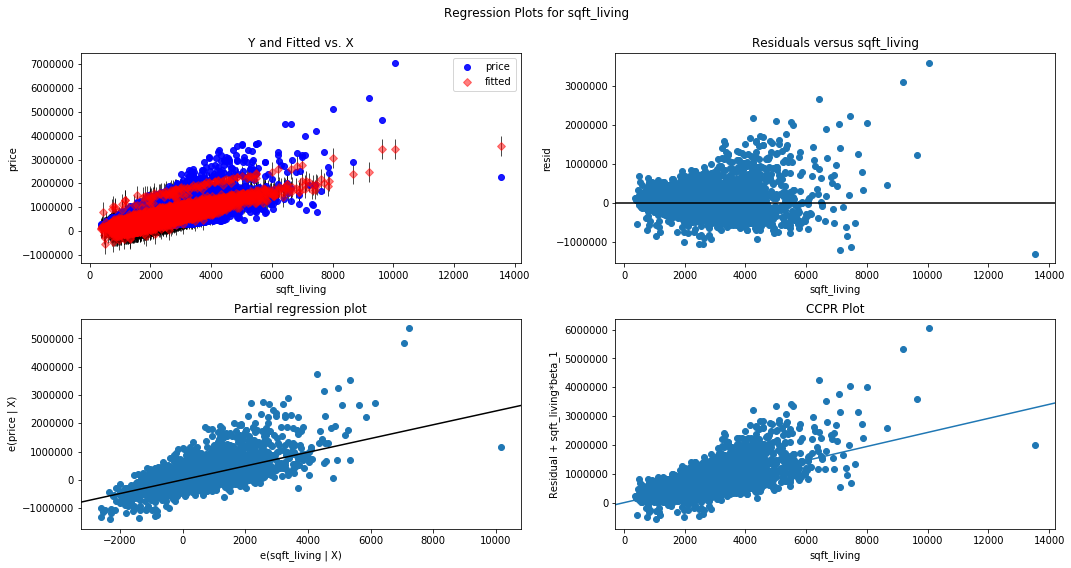

In [423]:
# plotting model 2 with sqft
fig5 = plt.figure(figsize=(15,8))
fig5 = sm.graphics.plot_regress_exog(dummy_mode12, 'sqft_living', fig=fig5)
plt.show()

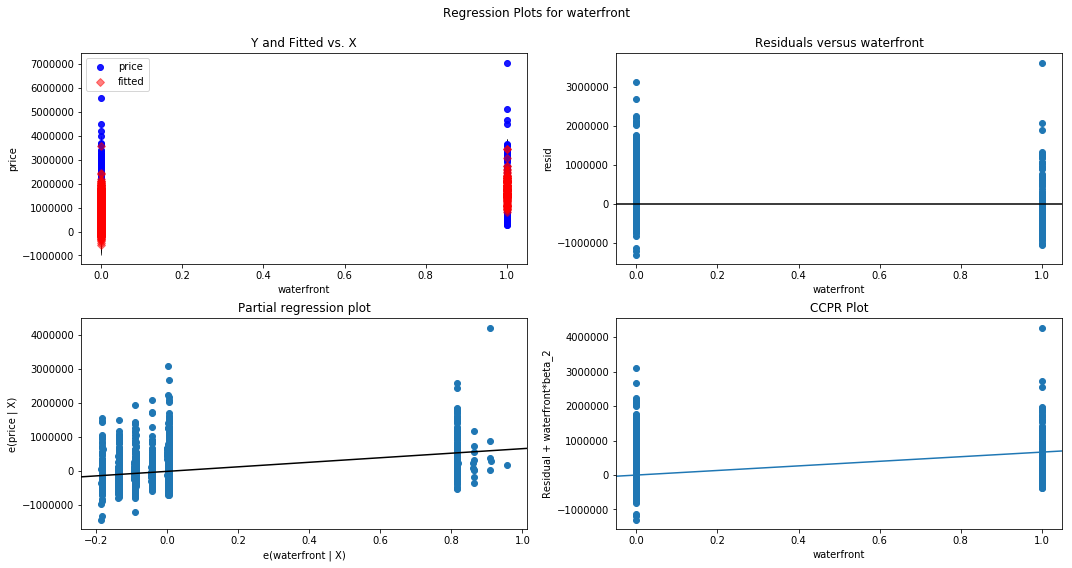

In [424]:
# plotting model 2 with waterfront
fig6 = plt.figure(figsize=(15,8))
fig6 = sm.graphics.plot_regress_exog(dummy_mode12, 'waterfront', fig=fig6)
plt.show()

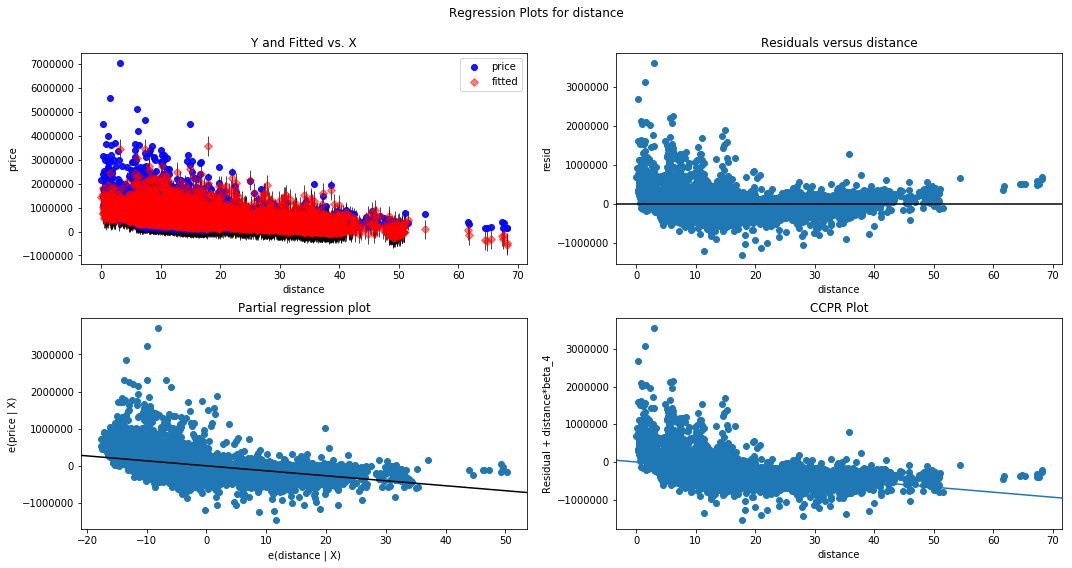

In [425]:
# plotting model 2 with distance
fig7 = plt.figure(figsize=(15,8))
fig7 = sm.graphics.plot_regress_exog(dummy_mode12, 'distance', fig=fig7)
plt.show()

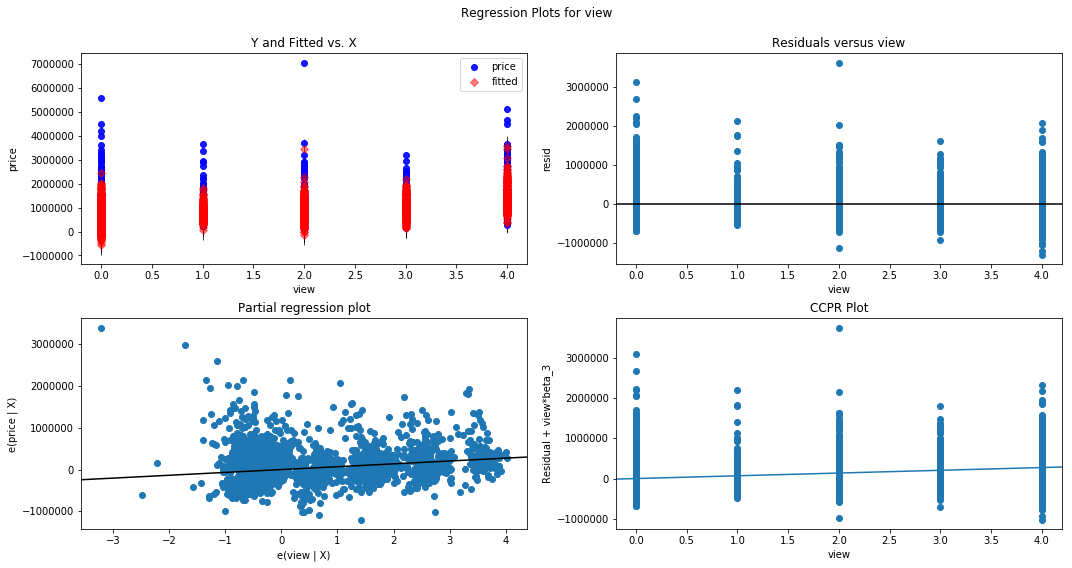

In [426]:
# plotting model 2 with distance
fig8 = plt.figure(figsize=(15,8))
fig8 = sm.graphics.plot_regress_exog(dummy_mode12, 'view', fig=fig8)
plt.show()

In [433]:
resid1 = dummy_model1.resid

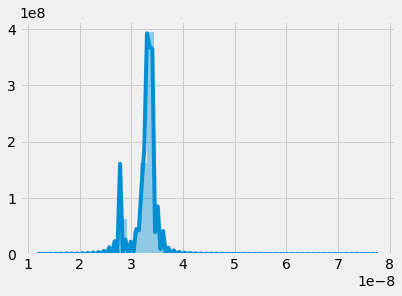

In [434]:
sns.distplot(resid1)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



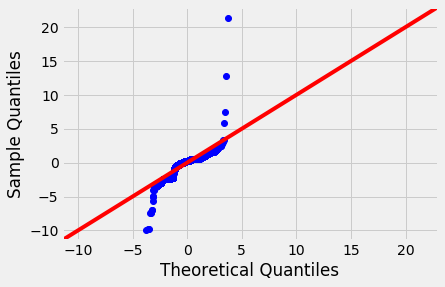

In [435]:
plt.style.use('fivethirtyeight')

resid1 = dummy_model1.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig.show()

In [430]:
#residuals of 2nd model
resid2 = dummy_mode12.resid

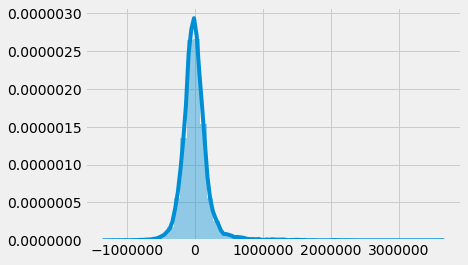

In [431]:
#histogram of residuals of 2nd model
sns.distplot(resid1)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



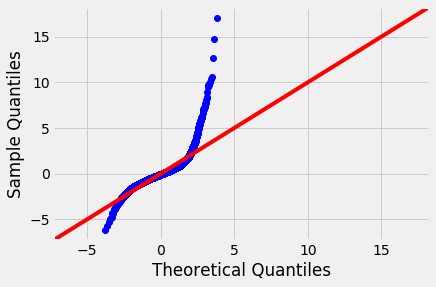

In [432]:
plt.style.use('fivethirtyeight')

resid2 = dummy_mode12.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig.show()